### Mise en place

In [31]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


### Récupération des données

In [32]:
import zipfile
import urllib

DOWNLOAD_ROOT = "https://archive.ics.uci.edu/ml/machine-learning-databases/00507/"
WISDM_PATH = os.path.join("datasets", "wisdm")
WISDM_URL = DOWNLOAD_ROOT + "wisdm-dataset.zip"

def fetch_wisdm_data(wisdm_url=WISDM_URL, wisdm_path=WISDM_PATH):
    if not os.path.isdir(wisdm_path):
        os.makedirs(wisdm_path)
    zip_path = os.path.join(wisdm_path, "wisdm-dataset.zip")
    if not os.path.isfile(zip_path):
        urllib.request.urlretrieve(wisdm_url, zip_path)
    uncompressed_path = os.path.join(wisdm_path, "wisdm-dataset")
    if not os.path.isdir(uncompressed_path):
        with zipfile.ZipFile(zip_path,"r") as zip_ref:
            zip_ref.extractall(wisdm_path)

## Etude des données venant de l'accéléromètre des smartwaches
### Téléchargement des données provenant des smartwatches 

In [36]:
import random
from random import randint

import arff
import pandas as pd

#Récupération des données d'une seule instance
def load_wisdm_data(subjectId, device, sensor, wisdm_path=WISDM_PATH):
    subjectIdStr = str(subjectId)
    arffPath = os.path.join(WISDM_PATH,'wisdm-dataset','arff_files',device,sensor,'data_'+subjectIdStr+'_'+sensor+'_'+device+'.arff')
    return arff.load(open(arffPath, 'r'))

# Création d'un dataframe à partir des données d'un sujet
wisdmExample = load_wisdm_data(1600, 'watch', 'accel')
attributesName = [wisdmExample['attributes'][i][0] for i in range (len(wisdmExample['attributes']))]
data = pd.DataFrame(data = wisdmExample['data'], columns = attributesName) 
print(data)

    ACTIVITY     X0     X1     X2     X3     X4     X5     X6     X7     X8  \
0          A  0.000  0.000  0.000  0.045  0.090  0.190  0.215  0.210  0.135   
1          A  0.000  0.000  0.000  0.000  0.030  0.250  0.305  0.225  0.125   
2          A  0.000  0.000  0.000  0.000  0.015  0.280  0.300  0.210  0.140   
3          A  0.000  0.000  0.000  0.005  0.070  0.245  0.275  0.220  0.130   
4          A  0.000  0.000  0.000  0.000  0.015  0.260  0.325  0.230  0.110   
..       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
322        S  0.730  0.070  0.090  0.030  0.040  0.030  0.005  0.005  0.000   
323        S  0.660  0.080  0.080  0.055  0.085  0.030  0.010  0.000  0.000   
324        S  0.920  0.065  0.010  0.000  0.000  0.005  0.000  0.000  0.000   
325        S  0.665  0.055  0.075  0.100  0.090  0.010  0.005  0.000  0.000   
326        S  0.715  0.075  0.050  0.035  0.110  0.010  0.005  0.000  0.000   

     ...   ZMFCC11   ZMFCC12     XYCOS     XZCOS   

In [37]:
# Récupération des données de plusieurs instances
SUBJECT_NUMBER = 51
FIRST_SUBJECT_ID=1600
l = [i+FIRST_SUBJECT_ID for i in range(SUBJECT_NUMBER)]
SUBJECTSID= l.remove(1614) #Le sujet 1614 n'est pas dans la liste ...

def load_multiple_wisdm_data(subjectToExtractNumber, device, sensor, method):
    d = []
    random.seed(1) #for reproductibility
    subjectToExtract = random.sample(l,subjectToExtractNumber)
    
    # Un seul dataframe pour tous les sujets
    if(method==1): 
        subjectsDf = pd.DataFrame(data = wisdmExample['data'], columns = attributesName)
        for i in range(subjectToExtractNumber):
            dataArff = load_wisdm_data(subjectToExtract[i], device, sensor)
            subjectDf = pd.DataFrame(data = dataArff['data'], columns = attributesName) 
            subjectsDf = subjectsDf.append(subjectDf)
        return subjectsDf 
    
    # Possibilité de créer une collection de dataFrames
    if(method==2):
        for i in range(subjectToExtractNumber):
            d.append(load_wisdm_data(subjectToExtract[i], device, sensor))
        return d      

#### Creation d'une collection de 10 dataframes correspondant aux données de 10 personnes

In [38]:
#Methode 1 
collection1 = load_multiple_wisdm_data(10, 'watch', 'accel', 1)
print("Methode 1")
print(collection1)

#Methode2
def create_dataFrame_fromArff(collection):
    dataFrameCollection = {}
    for i in range(len(collection)):
        dataOnePerson = collection[i]
        dataFrameCollection[i] = pd.DataFrame(data = dataOnePerson['data'], columns = attributesName) 
    return dataFrameCollection

collection2 = load_multiple_wisdm_data(10, 'watch', 'accel',2)
dataFrame = create_dataFrame_fromArff(collection2)
print("Methode 2")
print(dataFrame)

Methode 1
    ACTIVITY     X0     X1     X2     X3     X4     X5     X6     X7     X8  \
0          A  0.000  0.000  0.000  0.045  0.090  0.190  0.215  0.210  0.135   
1          A  0.000  0.000  0.000  0.000  0.030  0.250  0.305  0.225  0.125   
2          A  0.000  0.000  0.000  0.000  0.015  0.280  0.300  0.210  0.140   
3          A  0.000  0.000  0.000  0.005  0.070  0.245  0.275  0.220  0.130   
4          A  0.000  0.000  0.000  0.000  0.015  0.260  0.325  0.230  0.110   
..       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
328        S  0.410  0.225  0.095  0.045  0.125  0.090  0.005  0.005  0.000   
329        S  0.915  0.050  0.035  0.000  0.000  0.000  0.000  0.000  0.000   
330        S  0.570  0.055  0.060  0.105  0.140  0.035  0.025  0.010  0.000   
331        S  0.405  0.040  0.125  0.180  0.135  0.095  0.020  0.000  0.000   
332        S  0.460  0.035  0.160  0.120  0.110  0.085  0.030  0.000  0.000   

     ...   ZMFCC11   ZMFCC12     XYCOS   

#### Pour connaitre le type de chaque attribut  

In [39]:
collection1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4019 entries, 0 to 332
Data columns (total 93 columns):
ACTIVITY     4019 non-null object
X0           4019 non-null float64
X1           4019 non-null float64
X2           4019 non-null float64
X3           4019 non-null float64
X4           4019 non-null float64
X5           4019 non-null float64
X6           4019 non-null float64
X7           4019 non-null float64
X8           4019 non-null float64
X9           4019 non-null float64
Y0           4019 non-null float64
Y1           4019 non-null float64
Y2           4019 non-null float64
Y3           4019 non-null float64
Y4           4019 non-null float64
Y5           4019 non-null float64
Y6           4019 non-null float64
Y7           4019 non-null float64
Y8           4019 non-null float64
Y9           4019 non-null float64
Z0           4019 non-null float64
Z1           4019 non-null float64
Z2           4019 non-null float64
Z3           4019 non-null float64
Z4           4019 no

In [40]:
collection1.head()

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,A,0.0,0.0,0.0,0.045,0.090,0.190,0.215,0.210,0.135,...,0.504662,0.498178,-0.395887,-0.105039,-0.263814,-0.035912,-0.305539,-0.292265,12.7783,1600
1,A,0.0,0.0,0.0,0.000,0.030,0.250,0.305,0.225,0.125,...,0.497101,0.490714,-0.517585,-0.493655,0.208926,-0.166636,0.071774,-0.070860,12.8712,1600
2,A,0.0,0.0,0.0,0.000,0.015,0.280,0.300,0.210,0.140,...,0.438027,0.432398,-0.573148,-0.468498,0.001704,-0.090878,0.005053,-0.382557,12.5949,1600
3,A,0.0,0.0,0.0,0.005,0.070,0.245,0.275,0.220,0.130,...,0.447493,0.441743,-0.514097,-0.232246,-0.080241,-0.117089,0.137656,-0.265747,12.3521,1600
4,A,0.0,0.0,0.0,0.000,0.015,0.260,0.325,0.230,0.110,...,0.433304,0.427736,-0.461254,0.084470,-0.418888,-0.097265,-0.118795,-0.414198,12.4168,1600


#### Affichage des détails statistiques pour les sujets 

In [42]:
collection1.describe(include='all')

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
count,4019,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,...,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019
unique,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
top,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1637
freq,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,759
mean,NaN,0.326454,0.175039,0.109118,0.056755,0.057646,0.167973,0.057589,0.021089,0.010506,...,0.447729,0.441976,-0.002220,-0.161696,-0.203593,-0.147485,0.071639,0.141935,10.879248,NaN
std,NaN,0.376688,0.268446,0.218989,0.138122,0.114749,0.298017,0.134597,0.046304,0.024297,...,0.177584,0.175302,0.717855,0.640440,0.630581,0.417432,0.457104,0.418696,2.412418,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.304238,-0.300329,-0.999970,-0.999991,-0.999954,-0.997431,-0.995464,-0.995789,9.163820,NaN
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.351059,0.346549,-0.673922,-0.757699,-0.780061,-0.426554,-0.266363,-0.131447,9.795145,NaN
50%,NaN,0.150000,0.055000,0.015000,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000,...,0.443612,0.437912,-0.082495,-0.238158,-0.293608,-0.164653,0.083062,0.159042,9.989970,NaN
75%,NaN,0.630000,0.215000,0.105000,0.065000,0.085000,0.190000,0.055000,0.015000,0.005000,...,0.566929,0.559645,0.763147,0.355231,0.257731,0.112264,0.422905,0.446372,10.865450,NaN


In [44]:
print('Covariance')
collection1.cov()

Covariance


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
X0,0.141894,-0.018062,-0.023366,-0.011484,-0.012957,-0.049975,-0.015886,-0.005020,-0.002193,-0.002950,...,0.007944,0.007851,0.007750,0.181492,-0.053857,-0.033129,-0.036391,0.035031,0.007734,-0.046928
X1,-0.018062,0.072063,-0.000047,-0.005740,-0.007062,-0.026369,-0.008695,-0.002946,-0.001372,-0.001770,...,-0.000148,-0.000146,-0.000144,0.079707,-0.033600,-0.033483,-0.006684,0.001553,0.006794,-0.103707
X2,-0.023366,-0.000047,0.047956,0.000048,-0.002689,-0.014762,-0.004628,-0.001409,-0.000608,-0.000495,...,0.002670,0.002639,0.002605,-0.039161,0.047252,-0.029551,0.009099,0.002708,0.005092,-0.029179
X3,-0.011484,-0.005740,0.000048,0.019078,0.003516,-0.005177,-0.000930,0.000078,0.000109,0.000504,...,0.004501,0.004449,0.004392,-0.030956,0.013994,0.004850,0.003788,-0.002964,0.000168,0.027643
X4,-0.012957,-0.007062,-0.002689,0.003516,0.013167,0.001286,0.001852,0.001359,0.000649,0.000879,...,0.003686,0.003643,0.003596,-0.032914,0.005249,0.015605,0.004978,-0.007278,-0.003027,0.033236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YZCOS,-0.033129,-0.033483,-0.029551,0.004850,0.015605,0.042879,0.019646,0.006209,0.002999,0.003976,...,0.011297,0.011165,0.011022,-0.114630,-0.032045,0.397633,0.000725,-0.039822,-0.014876,0.304728
XYCOR,-0.036391,-0.006684,0.009099,0.003788,0.004978,0.029283,-0.003037,-0.000416,-0.000064,-0.000556,...,-0.000487,-0.000482,-0.000476,-0.069543,0.009378,0.000725,0.174249,0.043180,0.014639,-0.017079
XZCOR,0.035031,0.001553,0.002708,-0.002964,-0.007278,-0.010096,-0.007533,-0.005449,-0.002680,-0.003291,...,-0.005104,-0.005045,-0.004980,0.047235,-0.029382,-0.039822,0.043180,0.208944,-0.023584,-0.224608
YZCOR,0.007734,0.006794,0.005092,0.000168,-0.003027,-0.005199,-0.004776,-0.002396,-0.001260,-0.003129,...,-0.008907,-0.008803,-0.008690,0.044696,-0.065916,-0.014876,0.014639,-0.023584,0.175307,-0.114681


In [57]:
correlationMatrix = collection1.corr()
print('Correlation :')
collection1.corr()

Correlation :


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
X0,1.000000,-0.178623,-0.283260,-0.220721,-0.299751,-0.445177,-0.313333,-0.287796,-0.239571,-0.171591,...,0.117368,0.117368,0.117368,0.671179,-0.223246,-0.139472,-0.231433,0.203447,0.049039,-0.051641
X1,-0.178623,1.000000,-0.000793,-0.154816,-0.229255,-0.329604,-0.240650,-0.236983,-0.210356,-0.144461,...,-0.003063,-0.003063,-0.003063,0.413619,-0.195438,-0.197802,-0.059651,0.012657,0.060447,-0.160139
X2,-0.283260,-0.000793,1.000000,0.001576,-0.107022,-0.226197,-0.156996,-0.138997,-0.114185,-0.049514,...,0.067848,0.067848,0.067848,-0.249112,0.336916,-0.214000,0.099533,0.027054,0.055531,-0.055233
X3,-0.220721,-0.154816,0.001576,1.000000,0.221830,-0.125781,-0.050016,0.012155,0.032352,0.079944,...,0.181383,0.181383,0.181383,-0.312206,0.158196,0.055688,0.065708,-0.046941,0.002908,0.082960
X4,-0.299751,-0.229255,-0.107022,0.221830,1.000000,0.037594,0.119889,0.255828,0.232730,0.167857,...,0.178788,0.178787,0.178787,-0.399576,0.071421,0.215667,0.103930,-0.138762,-0.063009,0.120063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YZCOS,-0.139472,-0.197802,-0.214000,0.055688,0.215667,0.228173,0.231466,0.212644,0.195721,0.138119,...,0.099706,0.099706,0.099706,-0.253234,-0.079349,1.000000,0.002752,-0.138154,-0.056345,0.200318
XYCOR,-0.231433,-0.059651,0.099533,0.065708,0.103930,0.235389,-0.054053,-0.021533,-0.006283,-0.029180,...,-0.006500,-0.006500,-0.006500,-0.232077,0.035078,0.002752,1.000000,0.226299,0.083758,-0.016960
XZCOR,0.203447,0.012657,0.027054,-0.046941,-0.138762,-0.074110,-0.122444,-0.257438,-0.241343,-0.157743,...,-0.062146,-0.062146,-0.062146,0.143949,-0.100367,-0.138154,0.226299,1.000000,-0.123226,-0.203685
YZCOR,0.049039,0.060447,0.055531,0.002908,-0.063009,-0.041664,-0.084751,-0.123610,-0.123899,-0.163725,...,-0.118398,-0.118398,-0.118398,0.148708,-0.245819,-0.056345,0.083758,-0.123226,1.000000,-0.113537


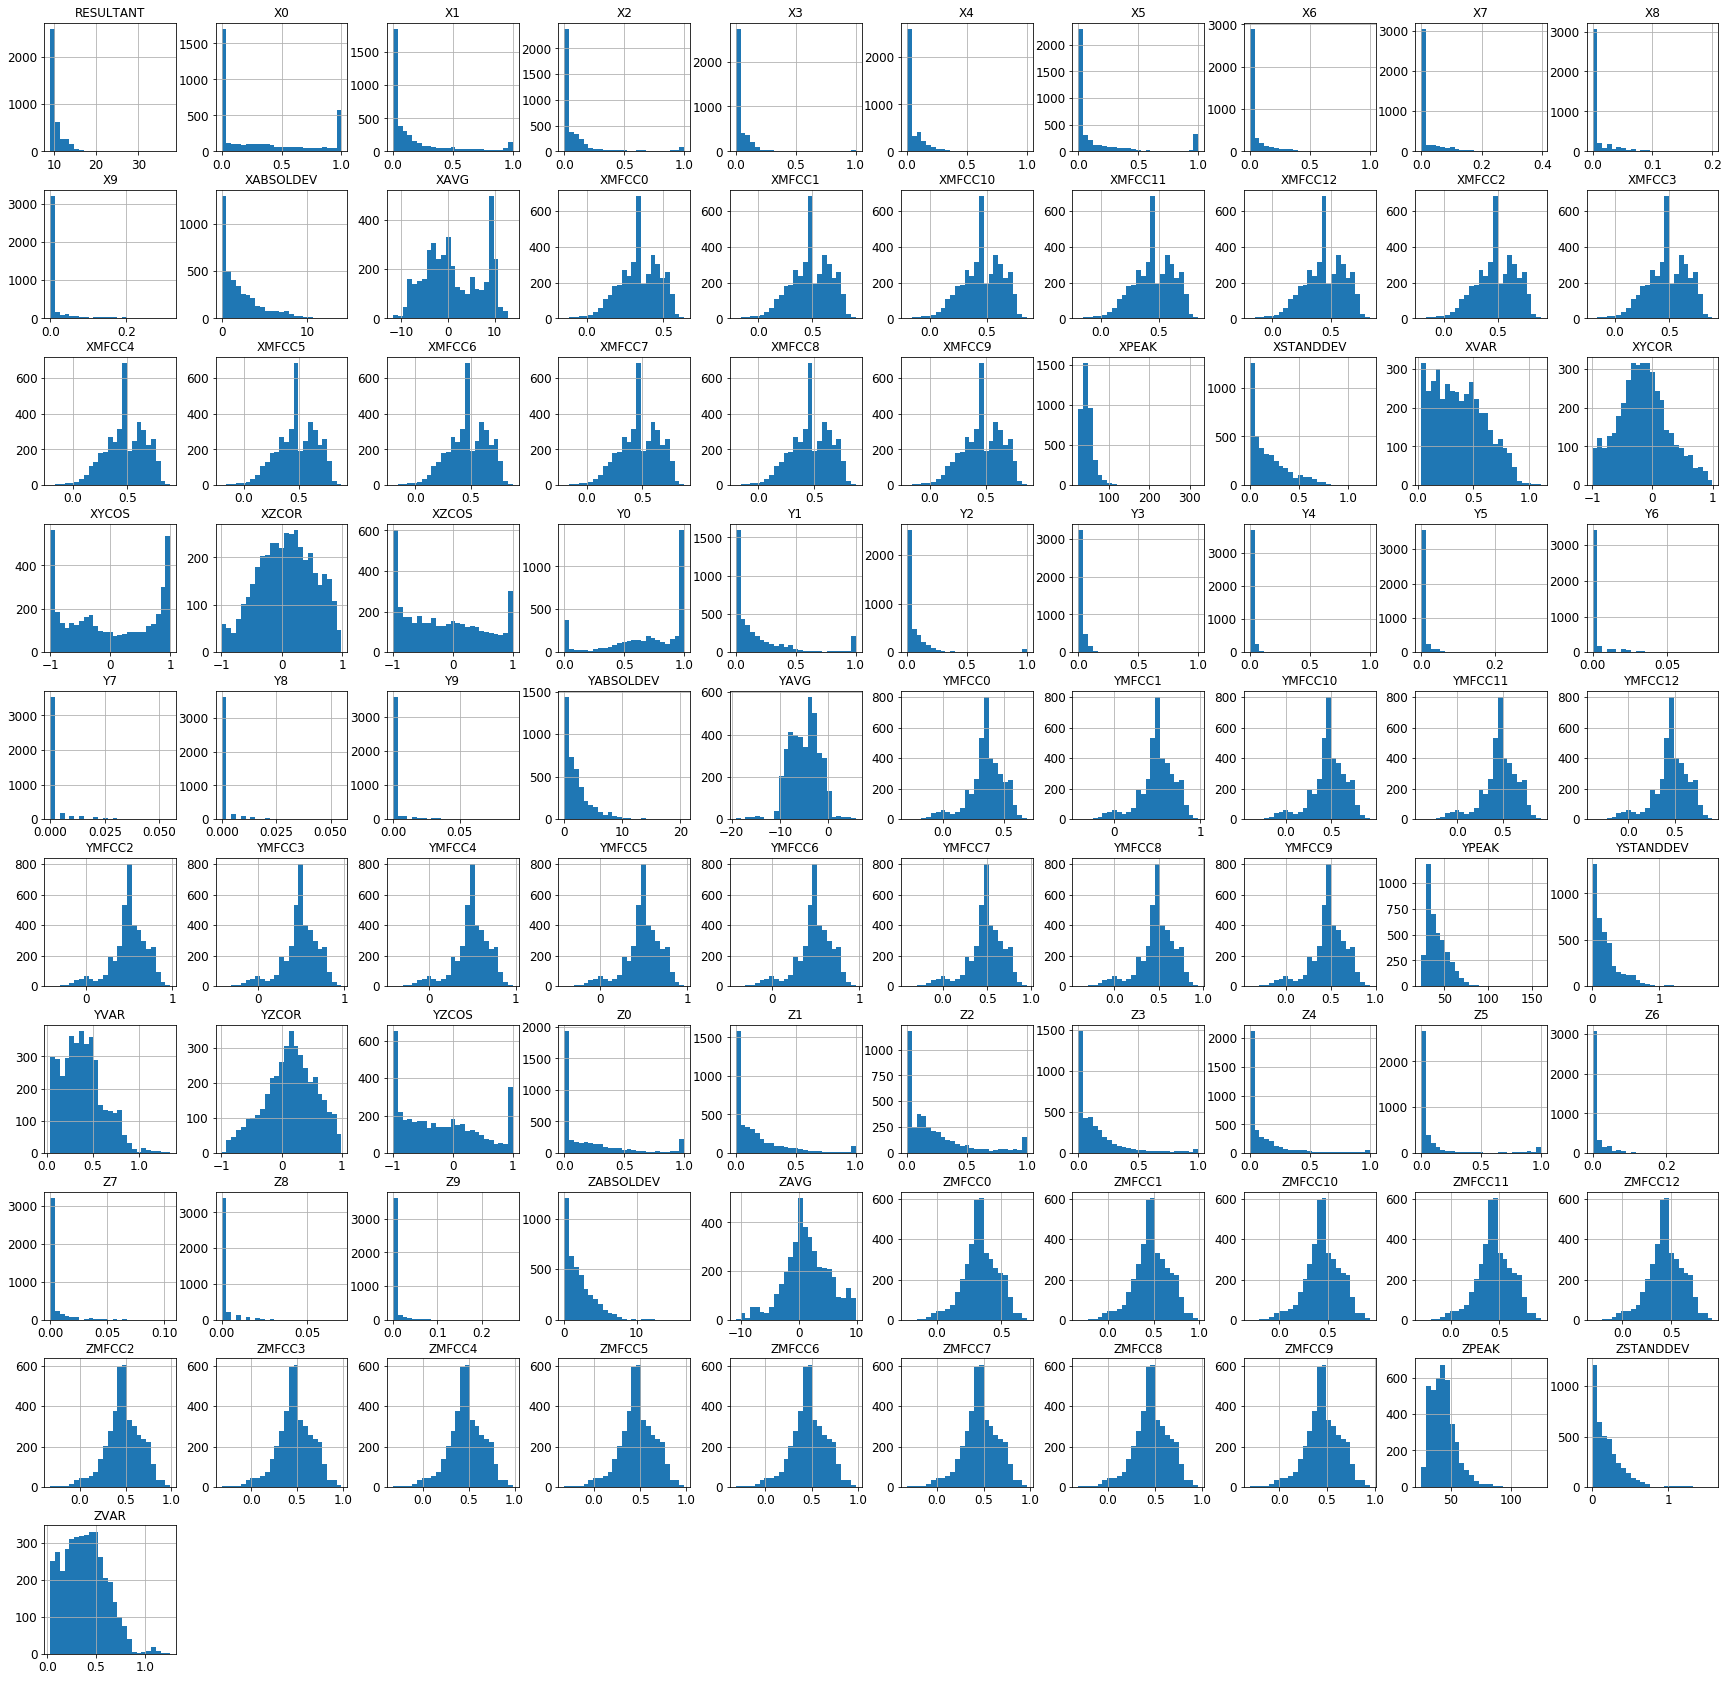

In [128]:
collection1.hist(bins = 25, figsize=(30,30))
plt.show()

On remarque que les histogrammes de certains attributs semblent similaires, comme ceux des attributs XMFCC{0-12}, les attributs YMFCC{0-12} et enfin ZMFCC{0-12}. Nous vérifierons par la suite la valeur de la corrélation entre ces attributs.

In [73]:
pd.set_option('display.max_rows', None)
correlationMatrix["XMFCC0"].sort_values(ascending=False)**2

XMFCC0       1.000000
XMFCC3       1.000000
XMFCC1       1.000000
XMFCC4       1.000000
XMFCC6       1.000000
XMFCC9       1.000000
XMFCC8       1.000000
XMFCC2       1.000000
XMFCC5       1.000000
XMFCC11      1.000000
XMFCC12      1.000000
XMFCC7       1.000000
XMFCC10      1.000000
XVAR         0.617838
XSTANDDEV    0.614266
XABSOLDEV    0.565927
YVAR         0.533844
YSTANDDEV    0.493239
ZVAR         0.478328
YABSOLDEV    0.454930
ZSTANDDEV    0.441233
ZABSOLDEV    0.425466
RESULTANT    0.340835
ZMFCC8       0.311979
ZMFCC10      0.311979
ZMFCC3       0.311979
ZMFCC9       0.311979
ZMFCC0       0.311979
ZMFCC2       0.311979
ZMFCC6       0.311979
ZMFCC11      0.311979
ZMFCC1       0.311979
ZMFCC4       0.311979
ZMFCC7       0.311979
ZMFCC5       0.311979
ZMFCC12      0.311979
X9           0.285922
YMFCC4       0.269764
YMFCC9       0.269764
YMFCC0       0.269764
YMFCC3       0.269764
YMFCC10      0.269764
YMFCC8       0.269764
YMFCC1       0.269764
YMFCC12      0.269764
YMFCC2    

In [78]:
correlationMatrix["YMFCC0"].sort_values(ascending=False)**2

YMFCC0       1.000000e+00
YMFCC3       1.000000e+00
YMFCC8       1.000000e+00
YMFCC2       1.000000e+00
YMFCC1       1.000000e+00
YMFCC7       1.000000e+00
YMFCC4       1.000000e+00
YMFCC6       1.000000e+00
YMFCC5       1.000000e+00
YMFCC9       1.000000e+00
YMFCC10      1.000000e+00
YMFCC12      1.000000e+00
YMFCC11      1.000000e+00
YVAR         7.293280e-01
XVAR         6.763346e-01
ZVAR         6.574254e-01
ZMFCC6       6.210696e-01
ZMFCC1       6.210696e-01
ZMFCC0       6.210696e-01
ZMFCC8       6.210696e-01
ZMFCC3       6.210696e-01
ZMFCC4       6.210696e-01
ZMFCC7       6.210696e-01
ZMFCC10      6.210696e-01
ZMFCC2       6.210696e-01
ZMFCC9       6.210696e-01
ZMFCC11      6.210696e-01
ZMFCC5       6.210696e-01
ZMFCC12      6.210696e-01
YSTANDDEV    5.671014e-01
XSTANDDEV    5.657214e-01
XABSOLDEV    5.307306e-01
YABSOLDEV    5.211219e-01
ZSTANDDEV    5.167769e-01
ZABSOLDEV    5.084707e-01
RESULTANT    2.758133e-01
XMFCC9       2.697641e-01
XMFCC4       2.697641e-01
XMFCC0      

In [75]:
correlationMatrix["ZMFCC0"].sort_values(ascending=False)**2

ZMFCC0       1.000000
ZMFCC2       1.000000
ZMFCC4       1.000000
ZMFCC1       1.000000
ZMFCC3       1.000000
ZMFCC7       1.000000
ZMFCC6       1.000000
ZMFCC5       1.000000
ZMFCC11      1.000000
ZMFCC9       1.000000
ZMFCC10      1.000000
ZMFCC8       1.000000
ZMFCC12      1.000000
ZVAR         0.727687
ZSTANDDEV    0.654830
YVAR         0.634187
ZABSOLDEV    0.625545
YMFCC1       0.621070
YMFCC10      0.621070
YMFCC7       0.621070
YMFCC9       0.621070
YMFCC8       0.621070
YMFCC6       0.621070
YMFCC2       0.621070
YMFCC5       0.621070
YMFCC3       0.621070
YMFCC11      0.621070
YMFCC4       0.621070
YMFCC0       0.621070
YMFCC12      0.621070
XVAR         0.611609
XSTANDDEV    0.546587
YSTANDDEV    0.523744
XABSOLDEV    0.496911
YABSOLDEV    0.467006
RESULTANT    0.322625
XMFCC10      0.311979
XMFCC0       0.311979
XMFCC2       0.311979
XMFCC7       0.311979
XMFCC9       0.311979
XMFCC4       0.311979
XMFCC6       0.311979
XMFCC1       0.311979
XMFCC3       0.311979
XMFCC11   

In [ ]:
print(correlationMatrix["XPEAK"].sort_values(ascending=False)**2)

Remarques : La corrélation entre les attributs XMFCC{0-12} est égale à 1. De même pour YMFCC{0-12} et ZMFCC{0-12}. On va donc ne prendre que un de chaque attribut par la suite

#### Réduction de dimensionalité

In [80]:
# Liste initiale des attributs 
collection1.columns

Index(['ACTIVITY', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'Y0', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Z0', 'Z1',
       'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'XAVG', 'YAVG', 'ZAVG',
       'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV',
       'XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 'XVAR', 'YVAR', 'ZVAR', 'XMFCC0',
       'XMFCC1', 'XMFCC2', 'XMFCC3', 'XMFCC4', 'XMFCC5', 'XMFCC6', 'XMFCC7',
       'XMFCC8', 'XMFCC9', 'XMFCC10', 'XMFCC11', 'XMFCC12', 'YMFCC0', 'YMFCC1',
       'YMFCC2', 'YMFCC3', 'YMFCC4', 'YMFCC5', 'YMFCC6', 'YMFCC7', 'YMFCC8',
       'YMFCC9', 'YMFCC10', 'YMFCC11', 'YMFCC12', 'ZMFCC0', 'ZMFCC1', 'ZMFCC2',
       'ZMFCC3', 'ZMFCC4', 'ZMFCC5', 'ZMFCC6', 'ZMFCC7', 'ZMFCC8', 'ZMFCC9',
       'ZMFCC10', 'ZMFCC11', 'ZMFCC12', 'XYCOS', 'XZCOS', 'YZCOS', 'XYCOR',
       'XZCOR', 'YZCOR', 'RESULTANT', 'class'],
      dtype='object')

In [ ]:
correlationMatrix["XPEAK"].sort_values(ascending=False)